## Application of Confusion Matrix and Logistic Regression on Adult Dataset



                                        Apply Coding in Adult Dataset

In [289]:
#Import Files
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [290]:
#read Adult dataset

data = pd.read_csv('Adult.data',header=0)
#Replace all missing values with Nan
data.replace(' ?', np.NaN,inplace=True)     
#For our ease of reading data we are giving them names
data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]   

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32560 non-null  int64 
 1   WorkClass      30724 non-null  object
 2   fnlwgt         32560 non-null  int64 
 3   Education      32560 non-null  object
 4   EducationNum   32560 non-null  int64 
 5   MaritalStatus  32560 non-null  object
 6   Occupation     30717 non-null  object
 7   Relationship   32560 non-null  object
 8   Race           32560 non-null  object
 9   Gender         32560 non-null  object
 10  CapitalGain    32560 non-null  int64 
 11  CapitalLoss    32560 non-null  int64 
 12  HoursPerWeek   32560 non-null  int64 
 13  NativeCountry  31977 non-null  object
 14  Income         32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [292]:
data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [293]:
#Drop null values
data = data.dropna()  
print(data.shape)
print(list(data.columns))

(30161, 15)
['Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income']


In [294]:
data['WorkClass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [295]:

data['WorkClass']=np.where(data['WorkClass'] =='State-gov', 'gov', data['WorkClass'])
data['WorkClass']=np.where(data['WorkClass'] =='Federal-gov', 'gov', data['WorkClass'])
data['WorkClass']=np.where(data['WorkClass'] =='Local-gov', 'gov', data['WorkClass'])

In [296]:
data['WorkClass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

## Data Exploration

In [297]:
data['WorkClass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: WorkClass, dtype: int64

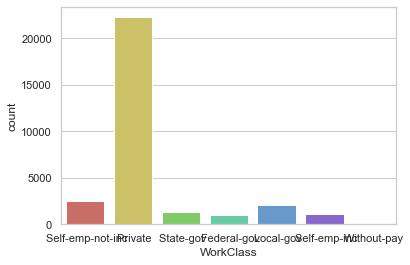

In [298]:

sns.countplot(x='WorkClass',data=data, palette='hls')
plt.show()

The above graph shows that number of private emoloyees is more as compare to others

In [299]:
count_no_sub = len(data[data['HoursPerWeek']==0])
count_sub = len(data[data['HoursPerWeek']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of people who are not working Hourely per week", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of people who are working Hourely per week", pct_of_sub*100)

percentage of people who are not working Hourely per week 0.0
percentage of people who are working Hourely per week 100.0


In [300]:
data.groupby('WorkClass').mean()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
WorkClass,,,,,,
Federal-gov,42.577943,185717.107105,10.948038,832.321315,111.731707,41.279958
Local-gov,41.743106,188422.886309,11.036768,829.230285,110.323174,41.002419
Private,36.794355,192719.985776,9.871085,879.858207,79.629498,40.250875
Self-emp-inc,46.027933,175775.219739,11.167598,4810.746741,153.504655,48.802607
Self-emp-not-inc,45.011605,175222.506603,10.211285,1913.134454,115.572229,44.432173
State-gov,39.362285,184524.089984,11.348200,683.140845,81.211268,39.053208
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286


In [301]:
data.groupby('Gender').mean()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
Gender,,,,,,
Female,36.883459,185926.150480,10.098651,570.176753,60.938765,36.932222
Male,39.184013,191655.846656,10.132048,1342.435743,101.545120,42.850827


In [302]:
data.groupby('Age').mean()

,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
Age,,,,,
17,181369.149390,6.655488,24.932927,50.280488,20.378049
18,194382.078300,8.064877,122.917226,33.049217,25.167785
19,207798.821549,9.050505,82.318182,40.983165,30.353535
20,200240.976153,9.322734,42.279809,31.968203,32.381558
21,198206.975845,9.397746,222.565217,54.223833,34.183575
...,...,...,...,...,...
84,197258.875000,9.875000,0.000000,0.000000,25.875000
85,126667.333333,10.333333,0.000000,0.000000,29.333333
86,149912.000000,14.000000,0.000000,0.000000,40.000000


In [303]:
data.groupby('MaritalStatus').mean()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
MaritalStatus,,,,,,
Divorced,42.874703,185663.029900,10.074039,753.148078,66.401519,41.522069
Married-AF-spouse,30.666667,186159.238095,10.142857,347.523810,0.000000,44.238095
Married-civ-spouse,42.770281,186499.041593,10.341557,1760.062993,123.564735,43.797156
Married-spouse-absent,40.302703,194416.532432,9.191892,657.272973,49.964865,39.859459
Never-married,28.460360,195714.932545,10.009563,383.650283,52.185501,37.235578
Separated,39.397231,207457.194888,9.384452,573.953142,61.301384,39.709265
Widowed,57.750907,175353.795647,9.178960,587.043531,77.610641,34.422007


Text(0, 0.5, 'Workclass')

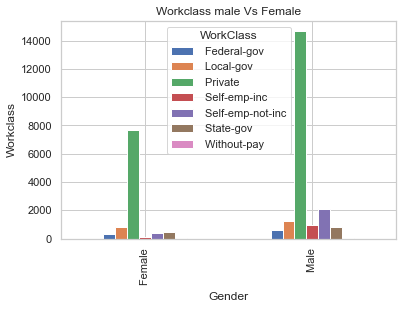

In [304]:
%matplotlib inline
pd.crosstab(data.Gender,data.WorkClass).plot(kind='bar')
plt.title('Workclass male Vs Female')
plt.xlabel('Gender')
plt.ylabel('Workclass')

The above graph shows that females are less into jobs as compare to males

Text(0, 0.5, 'Marital Status')

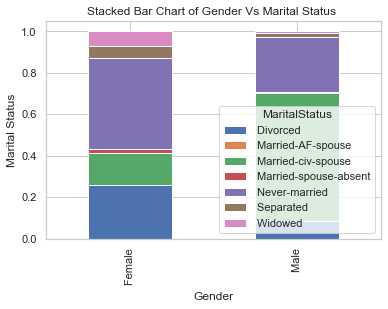

In [305]:
table=pd.crosstab(data.Gender,data.MaritalStatus)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender Vs Marital Status ')
plt.xlabel('Gender')
plt.ylabel('Marital Status')

The above figure shows Ratio of Female and male material Status

Text(0, 0.5, 'Frequency')

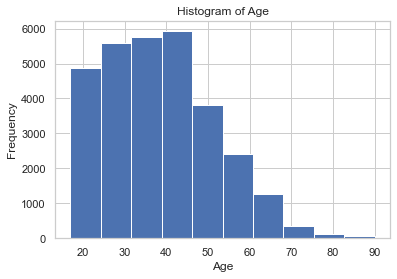

In [306]:
data.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Most people are of the age between 30 to 40

Text(0, 0.5, 'Frequency of Jobs')

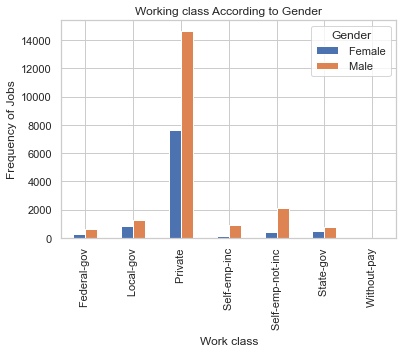

In [307]:
pd.crosstab(data.WorkClass,data.Gender).plot(kind='bar')
plt.title('Working class According to Gender')
plt.xlabel('Work class')
plt.ylabel('Frequency of Jobs')

## Create Dummy Values

In [308]:
print(data.Gender.value_counts())

 Male      20379
 Female     9782
Name: Gender, dtype: int64


In [309]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income'] 

Features after get_dummies:
 ['Age', 'fnlwgt', 'EducationNum', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'WorkClass_ Federal-gov', 'WorkClass_ Local-gov', 'WorkClass_ Private', 'WorkClass_ Self-emp-inc', 'WorkClass_ Self-emp-not-inc', 'WorkClass_ State-gov', 'WorkClass_ Without-pay', 'Education_ 10th', 'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th', 'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th', 'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors', 'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters', 'Education_ Preschool', 'Education_ Prof-school', 'Education_ Some-college', 'MaritalStatus_ Divorced', 'MaritalStatus_ Married-AF-spouse', 'MaritalStatus_ Married-civ-spouse', 'MaritalStatus_ Married-spouse-a

In [310]:
data_dummies.head()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Private,WorkClass_ Self-emp-inc,...,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia,Income_ <=50K,Income_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [311]:
features = data_dummies.loc[:, 'Age':'Occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['Income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (30161, 50)  y.shape: (30161,)


## Over-Sampling using SMOTE

In [312]:
from imblearn.over_sampling import SMOTE

In [313]:
X = data_final.loc[:, data_final.columns != 'Age']
y = data_final.loc[:, data_final.columns == 'Age']

In [314]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns


In [315]:
#os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X=data_final
os_data_y=data
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Age'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Age in oversampled data",len(os_data_y[os_data_y['Age']==0]))
print("Age in Oversampled data",len(os_data_y[os_data_y['Age']==1]))
print("Proportion of age in oversampled data is ",len(os_data_y[os_data_y['Age']==0])/len(os_data_X))
print("Proportion of age in oversampled data is ",len(os_data_y[os_data_y['Age']==1])/len(os_data_X))

length of oversampled data is  30161
Age in oversampled data 0
Age in Oversampled data 0
Proportion of age in oversampled data is  0.0
Proportion of age in oversampled data is  0.0


## Recursive feature elimination

In [316]:
data_categorical = pd.get_dummies(data.select_dtypes('object'))
data_categorical=data_categorical.astype(dtype='category')
data_non_categorical = data                                           #training_data.select_dtypes(exclude = 'object')

data_onehotencoded = pd.concat([data_non_categorical, data_categorical], axis=1,join='inner')

In [319]:
data_final_vars=data_onehotencoded.values.tolist()
y=['Gender']
X=[i for i in data_onehotencoded if i not in y]

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [339]:
features = data_dummies.loc[:, 'Age':'Occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['Income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (30161, 50)  y.shape: (30161,)


In [340]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.ravel())   
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[False False False False False False False False False False  True  True
 False False False False False False  True False False False False  True
 False False False  True False  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True False False False
 False  True]
[23 26  5 25 24 22 13  3  2 15  1  1 29  9  7 12 20 10  1 14  4 11 21  1
 16  6 27  1 17  1 30  1  1  1  1  1  1 31  1  1  1  1  1  1  1 19 18  8
 28  1]


## Logistic Regression Model Fitting

In [342]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.79


In [343]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


## Confusion Matrix

In [344]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5505  226]
 [1344  466]]


In [345]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88      5731
           1       0.67      0.26      0.37      1810

    accuracy                           0.79      7541
   macro avg       0.74      0.61      0.62      7541
weighted avg       0.77      0.79      0.75      7541



## Interpretation

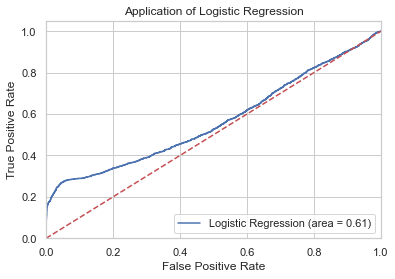

In [348]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Application of Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()